In [12]:
%load_ext autoreload
%autoreload 2

import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Ensure we're in the project root
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')

# Add project root to path
sys.path.append(os.path.abspath("."))

import torch
import logging
import matplotlib.pyplot as plt

# Configure logging to be less verbose
logging.basicConfig(level=logging.WARNING)  # Changed from INFO to WARNING

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Using device: {device}")
print(f"✅ Current directory: {os.getcwd()}")
print(f"✅ Python path includes: {os.path.abspath('.')}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Using device: cpu
✅ Current directory: D:\colorization_task3\conditional-colorization-project
✅ Python path includes: D:\colorization_task3\conditional-colorization-project


In [13]:
import os

# Check if data directories exist
data_dirs = ['data/train', 'data/val']
data_status = {}

for data_dir in data_dirs:
    if os.path.exists(data_dir):
        num_images = len([f for f in os.listdir(data_dir) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
        data_status[data_dir] = num_images
        print(f"✅ {data_dir}: {num_images} images")
    else:
        data_status[data_dir] = 0
        print(f"❌ {data_dir}: Directory not found")
        print(f"   Please create this directory and add training images")

# Check if we have enough data
total_images = sum(data_status.values())
if total_images < 2:
    print(f"⚠️  Warning: Only {total_images} images found. Consider adding more for better results.")
else:
    print(f"✅ Total dataset: {total_images} images")

✅ data/train: 10 images
✅ data/val: 10 images
✅ Total dataset: 20 images


In [14]:
# Only proceed if we have the corrected code
try:
    from src.train import Trainer
    print("✅ Trainer imported successfully")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Please make sure you have the corrected src/train.py file")

# Training configuration - optimized for notebook use
config = {
    'data_root': 'data/train',
    'val_root': 'data/val',
    'size': 256,
    'base': 32,  # Smaller base for faster training
    'max_hints': 15,
    'epochs': 2,  # Reduced for quick testing
    'batch_size': 1,  # Reduced to prevent memory issues
    'learning_rate': 1e-4,
    'weight_decay': 1e-5,
    'grad_clip': 1.0,
    'scheduler': 'none',
    'scheduler_patience': 5,
    'step_size': 30,
    'early_stopping_patience': 0,
    'num_workers': 0,  # Prevent multiprocessing issues
    'pin_memory': False,
    'checkpoint_dir': 'checkpoints',
    'sample_dir': 'samples',
    'device': device
}

# Create directories
os.makedirs('checkpoints', exist_ok=True)
os.makedirs('samples', exist_ok=True)

# Check if data exists before training
if os.path.exists(config['data_root']) and len(os.listdir(config['data_root'])) > 0:
    try:
        print("🚀 Starting training...")
        trainer = Trainer(config)
        trainer.train()
        print("✅ Training completed successfully!")
        
        # List created checkpoints
        if os.path.exists('checkpoints'):
            checkpoints = [f for f in os.listdir('checkpoints') if f.endswith('.pth')]
            print(f"✅ Created checkpoints: {checkpoints}")
        
    except Exception as e:
        print(f"❌ Training failed: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Training data not found or empty. Please add images to data/train/")

INFO:src.dataset:Found 10 images in data/train
INFO:src.dataset:Found 10 images in data/val
INFO:src.train:Validation dataset: 10 images
INFO:src.train:Training dataset: 10 images


✅ Trainer imported successfully
🚀 Starting training...


INFO:src.model:Initialized UNet with in_channels=4, out_channels=2, base=32
INFO:src.train:Model initialized: {'total_parameters': 7763362, 'trainable_parameters': 7763362, 'in_channels': 4, 'out_channels': 2, 'base_channels': 32}
INFO:src.train:Training setup complete. Optimizer: Adam, LR: 0.0001
INFO:src.train:Starting training...
Epoch 1/2:  90%|█████████████████████████████████████████████████████      | 9/10 [00:21<00:02,  2.00s/it, loss=0.2783]INFO:src.utils:Image saved to samples\train_samples_epoch_1.png
INFO:src.train:Sample grid saved: samples\train_samples_epoch_1.png
Epoch 1/2: 100%|██████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.13s/it, loss=0.2783]
INFO:src.utils:Image saved to samples\val_samples_epoch_1.png
INFO:src.train:Sample grid saved: samples\val_samples_epoch_1.png
INFO:src.train:Epoch 1: train_loss=0.2783, val_loss=0.0539
INFO:src.train:New best model saved with val_loss: 0.0539
INFO:src.train:Checkpoint saved: checkpoints\ckpt

✅ Training completed successfully!
✅ Created checkpoints: ['best_model.pth', 'ckpt_epoch_1.pth', 'ckpt_epoch_2.pth', 'ckpt_epoch_3.pth']


✅ Found 4 sample files


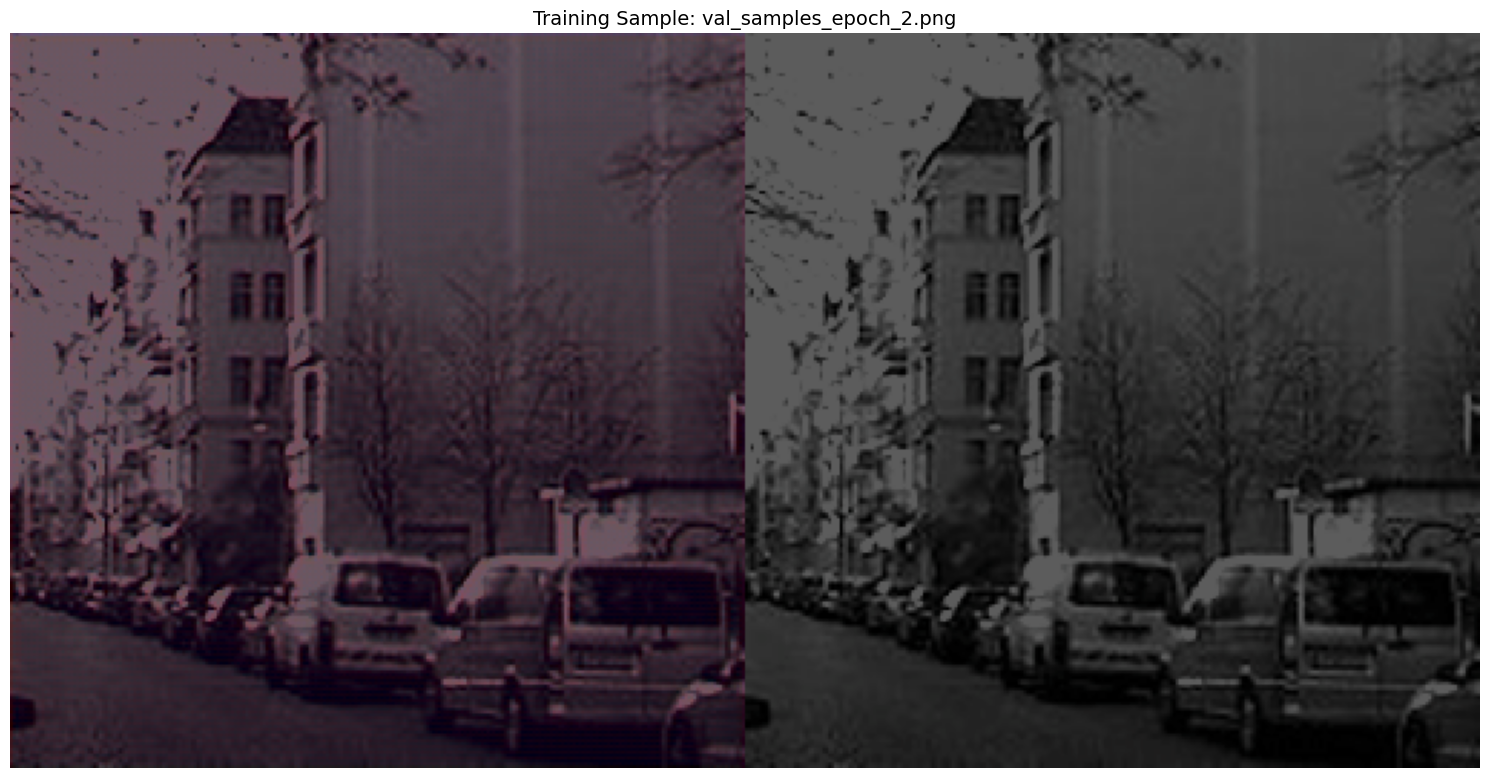

✅ Sample from: samples\val_samples_epoch_2.png
✅ Image size: (512, 256)
✅ Found 4 checkpoint files:
   - best_model.pth
   - ckpt_epoch_1.pth
   - ckpt_epoch_2.pth
   - ckpt_epoch_3.pth


In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

# Find sample images
sample_files = glob.glob('samples/*.png') + glob.glob('samples/*.jpg') + glob.glob('samples/*.jpeg')
sample_files = [f for f in sample_files if os.path.isfile(f)]


if sample_files:
    print(f"✅ Found {len(sample_files)} sample files")
    
    # Show the most recent sample
    latest_sample = sorted(sample_files)[-1]
    
    try:
        plt.figure(figsize=(15, 8))
        img = Image.open(latest_sample)
        plt.imshow(img)
        plt.title(f'Training Sample: {os.path.basename(latest_sample)}', fontsize=14)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Sample from: {latest_sample}")
        print(f"✅ Image size: {img.size}")
        
    except Exception as e:
        print(f"❌ Error displaying sample: {e}")
else:
    print("❌ No training samples found")
    
    # Check if samples directory exists
    if not os.path.exists('samples'):
        print("❌ Samples directory doesn't exist")
    else:
        all_files = os.listdir('samples')
        print(f"Files in samples directory: {all_files}")

# Also check checkpoints
checkpoint_files = glob.glob('checkpoints/*.pth')
if checkpoint_files:
    print(f"✅ Found {len(checkpoint_files)} checkpoint files:")
    for ckpt in sorted(checkpoint_files):
        print(f"   - {os.path.basename(ckpt)}")
else:
    print("❌ No checkpoint files found")